# Exponential Moving Average

The EMA is a filter that applies weighting factors which decrease exponentially. The weighting for each older data point decreases exponentially, never reaching zero. The EMA at time $t$ is given by:

$$ \hat{y}_t = \alpha y_t + (1 - \alpha) \hat{y}_{t-1} $$

Let's see how it change on a **impulse signal** defined as: 
$$ y_t = \begin{cases} 1 & \text{if } t = 0 \\ 0 & \text{otherwise} \end{cases} $$


In [ ]:
import sys

if 'google.colab' in sys.modules:
    !pip install -q darts pandas numpy matplotlib statsforecast prophet==1.2.1 cmdstanpy==1.2.5
    !wget -O style.py https://raw.githubusercontent.com/jacksalici/tsa-lectures/refs/heads/main/style.py
else:
    import os.path
    sys.path.append(os.path.abspath(os.path.join(os.path.dirname("."), os.path.pardir)))

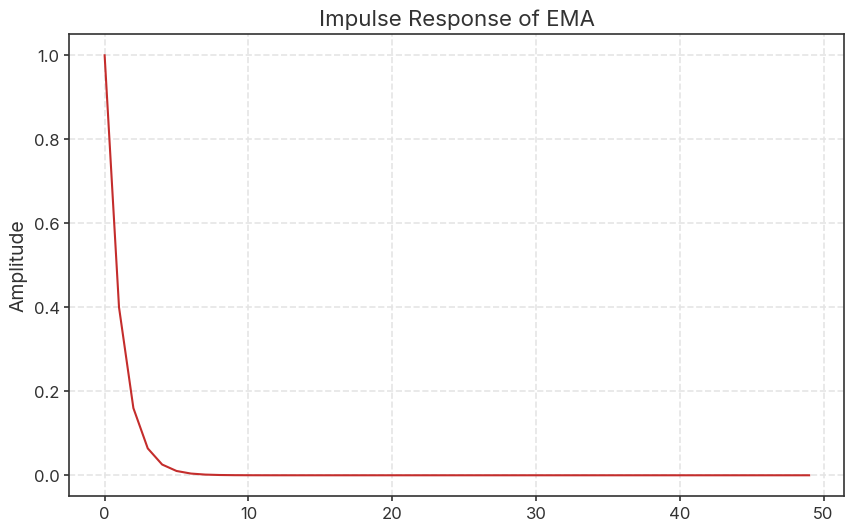

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from style import MyStyle

def ema_impulse_response(alpha, n_samples):
    impulse = np.zeros(n_samples)
    impulse[0] = 1  # Impulse at time 0

    ema_values = np.zeros(n_samples)
    ema_values[0] = impulse[0]

    for i in range(1, n_samples):
        ema_values[i] = (1 - alpha) * impulse[i] + (alpha) * ema_values[i - 1]

    return ema_values

def plot_stem(x, y, step = 1):

    plt.figure(figsize=(10, 6))

    plt.plot(x[::step], y[::step])
    plt.title(f"Impulse Response of EMA")
    plt.ylabel("Amplitude")

    MyStyle().apply()
    plt.show()
    

alpha_value = 0.4
n_samples_value = 50


ema_values = ema_impulse_response(alpha_value, n_samples_value)
plot_stem(np.arange(n_samples_value), ema_values)


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact

def interactive_ema(alpha, n_samples):
    ema_values = ema_impulse_response(alpha, n_samples)
    plot_stem(np.arange(n_samples), ema_values)

alpha_slider = widgets.FloatSlider(value=0.4, min=0.01, max=1.0, step=0.01, description='Alpha:')
n_samples_slider = widgets.IntSlider(value=50, min=10, max=200, step=10, description='Samples:')

interact(interactive_ema, alpha=alpha_slider, n_samples=n_samples_slider)